In [1]:
import matplotlib.pyplot as plt
import numpy as np


Define some functions

In [33]:
def f(ene,N):
    
    #fk= [2*ene]*int(N/2) + [2*ene + 5|.]*int(N/2) #-V
    #return fk[:N]
    return [2*ene0]*N
def numerov(ene,y0,y1,h,N): #
    y=[0]*N
    y[0]=y0
    y[1]=y1
    
    for i in range(2,len(y)):
        t1=(2- f(ene,N)[i-1]*5*h**2/6)*y[i-1]
        t2= (1 + f(ene,N)[i-2]*h**2/12)*y[i-2]
        t3= 1+ f(ene,N)[i]*h**2/12
        #print (f(ene,N)[i-1]*y[i-1],5*h**2/6,f(ene,N)[i-1]*y[i-1]*5*h**2/6)
        y[i] = ( t1-  t2)/( t3)
    
    return y

Initiate some constants

In [128]:
h=.001
N=1000
well_width=N*h
ene1=3
deltaE=2

In [129]:
# Take a guess at a wavefunction with some energy

In [130]:
psi1=numerov(ene1,0,1e-6, h,N)

In [131]:
# increase the energy and go again

In [132]:
ene2=ene1+deltaE

In [133]:
psi2=numerov(ene2,0,1e-6, h,N)

In [134]:
# plot and see how they look 

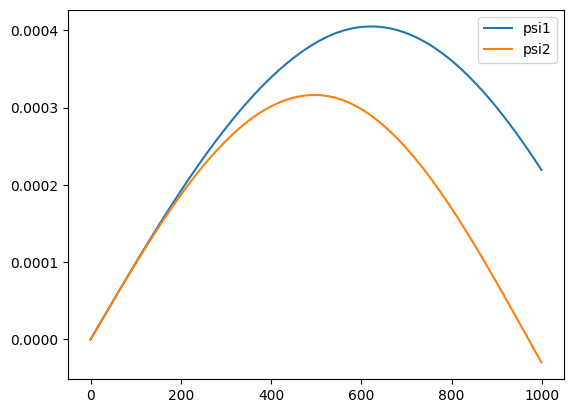

In [135]:
plt.plot(psi1,label="psi1")
plt.plot(psi2,label="psi2")
plt.legend()
plt.show()

Notice how wavefunciton is "bending" towards the x axis as we increase the energy. There must a point somewhere in between that corresponds to the solution where wavefucntion becomes exactly 0 at the last point of the x-grid 

In [136]:
# Take dot product to see if the wavefunctions have changed the sign 
dprod=np.dot(psi1,psi2)

In [137]:
dprod

6.395184444835561e-05

In [138]:
plt.plot(psi1) #plot reference wavefunction

while dprod > 0 : 
    ene2=ene2+deltaE #keep increasing the energy till dot profuct become negative
    psi2= numerov(ene2,0,1e-6, h,N)
    
    dprod = np.dot(psi1,psi2)
    plt.plot(psi2)
    plt.axhline(ls=':')
    #print (dprod)

In [139]:
from scipy.optimize import bisect
# bisection method from scipy

Bisection requires a function. In this case we need to check for the value last point of the wavefunction. So the function is f(psi)=psi[-1] 

In [140]:
def get_last_point(ene,y0,y1, h,N):
    y= numerov(ene,y0,y1, h,N)
    return y[-1]

In [141]:
get_last_point(ene1,0,1e-6, h,N)

0.00021935226124523687

In [142]:
get_last_point(ene2,0,1e-6, h,N)

-0.00012563743213238074

In [143]:
e_root=bisect(get_last_point,ene1,ene2,args=(0,1e-6, h,N),xtol=1e-7)

In [144]:
print(e_root)

4.691527158021927


In [145]:
get_last_point(e_root,0,1e-6, h,N)

8.930530113746941e-12

In [146]:
psi=numerov(e_root,0,1e-6, h,N)

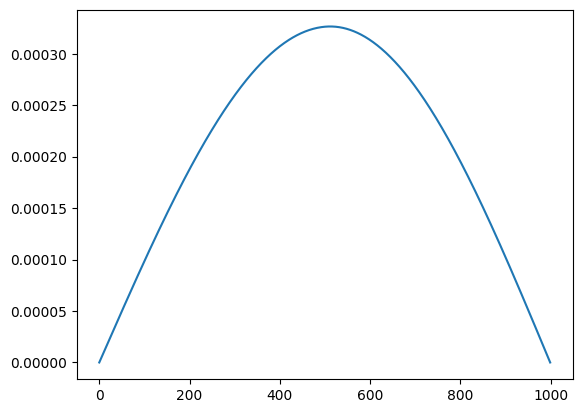

In [147]:
plt.plot(psi)
plt.show()

Normalize

In [250]:
norm=np.sqrt(np.dot(psi,psi))

In [251]:
psi=psi/norm

In [252]:
np.dot(psi,psi)

1.0

In [266]:
plt.figure(figsize=(10,4))
plt.plot(psi)
plt.axvline(0,color='olive')
plt.axvline(N,color='olive')
plt.axhline(0,xmin=0,xmax=1,color='olive')
plt.show()

---

**Excited states**

To fins the excited states we need a trial wevefuction with correct nodes

In [375]:
def find_nodes(y):
    n_nodes=0
    for i in range(1,len(y)-1): # avoid las point due to error in bisection
        #print(y[i],y[i]*y[i-1])
        if y[i]*y[i-1] < 0 :
            n_nodes+=1
    return n_nodes
         

In [223]:
desired_nodes=1
ene1=.1
psi1=numerov(ene1,0,1e-6,h,N)
#print (find_nodes(psi1))
if find_nodes(psi1) < desired_nodes:
    print ("Increase the energy")
elif find_nodes(psi1) == desired_nodes:
    print ("This looks like a good guess")
else:
    print ("Decrease the energy")


This looks like a good guess


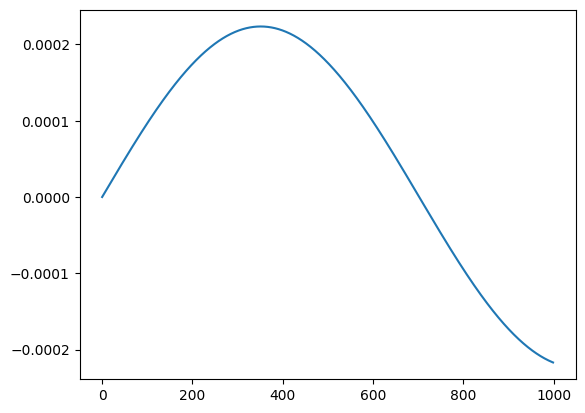

In [224]:
plt.plot(psi1)

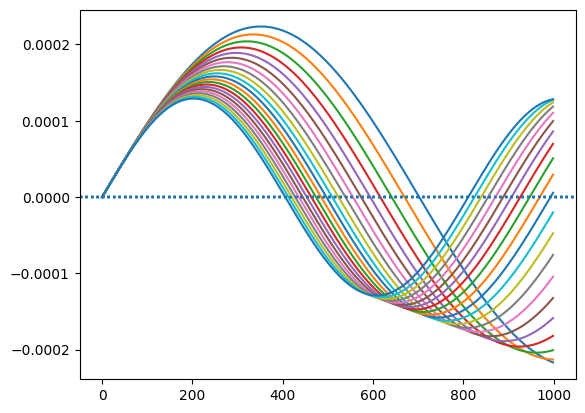

In [225]:
plt.plot(psi1) #plot reference wavefunction
dprod=1 # some positive number  
ene2=ene1 # some guess
while dprod > 0 : 
    ene2=ene2+deltaE #keep increasing the energy till dot profuct become negative
    psi2= numerov(ene2,0,1e-6, h,N)
    
    dprod = np.dot(psi1,psi2)
    plt.plot(psi2)
    plt.axhline(ls=':')
    #print (dprod)

In [226]:
e_root=bisect(get_last_point,ene1,ene2,args=(0,1e-6, h,N),xtol=1e-7)

In [227]:
e_root

0.19778738021850595

In [228]:
psi=numerov(e_root,0,1e-6, h,N)

In [229]:
norm=np.sqrt(np.dot(psi,psi))
psi=psi/norm

In [230]:
plt.plot([i*h for i in range(N)],psi)

---
# Spherical potential
## Case: $l=0$

In [296]:
def gen_pot(N,h,Rw,V0):
    V=[0]*N
    for i in range (N) :
        if i*h <= Rw : V[i] = V0 
    
    return V

def f(ene,N,h,Rw,V,l) :
    k=[0]*N
    #V=gen_pot(N,h,Rw,V0)
    for i in range(N):
        #k[i] = 2*(ene - V[i])
        if i == 0: #avoid 1/0
            k[i] = 2*(ene - (V[i] + 0.5*l*(l+1)/(h*.1)**2 ))
        else :    
            k[i] = 2*(ene - (V[i] + 0.5*l*(l+1)/(h*i)**2 ))
    
    return k
    
    

In [297]:
def numerov_fwd(ene,y0,y1,h,N,Rw,V,l): #
    y=[0]*N
    y[0]=y0
    y[1]=y1
    
    for i in range(2,int(Rw/h)+1):
        
        t1=(2- f(ene,N,h,Rw,V,l)[i-1]*5*h**2/6)*y[i-1]
        t2= (1 + f(ene,N,h,Rw,V,l)[i-2]*h**2/12)*y[i-2]
        t3= 1+ f(ene,N,h,Rw,V,l)[i]*h**2/12
        
        y[i] = ( t1-  t2)/( t3)
    
    return y

In [298]:
def numerov_bkw(ene,yl,yl1,h,N,Rw,V,l): #
    y=[0]*N
    y[-1]=yl
    y[-2]=yl1
    
    for i in range(N-3,int(Rw/h)-1,-1):
        #print (i,i+1,i+2)
        t1=(2- f(ene,N,h,Rw,V,l)[i+1]*5*h**2/6)*y[i+1]
        t2= (1 + f(ene,N,h,Rw,V,l)[i+2]*h**2/12)*y[i+2]
        t3= 1+ f(ene,N,h,Rw,V,l)[i]*h**2/12
        
        y[i] = (t1- t2)/( t3)
    
    return y

In [299]:
#http://isdl.cau.ac.kr/education.data/numerical.analysis/Lecture17.pdf
def backward_drvt(y,h,loc):
    return (3*y[loc] - 4*y[loc-1] + y[loc-2])/(2*h)

def forward_drvt(y,h,loc):
    return (-3*y[loc] + 4*y[loc+1] - y[loc+2])/(2*h)
    
    

In [300]:
h=0.01
N=1000
ene=-8
l=0
V0=-10
Rw=.7*N*h  # .x of the total width
V=gen_pot(N,h,Rw,V0) 



In [301]:
phi_left=numerov_fwd(ene,0,1e-5,h,N,Rw,V,l)

In [302]:
phi_right=numerov_bkw(ene,0,1e-10,h,N,Rw,V,l)

In [303]:
Rw/h

700.0

In [304]:
backward_drvt(phi_left,h, int(Rw/h))/phi_left[int(Rw/h)]

0.27610823383424665

In [305]:
forward_drvt(phi_right,h,int(Rw/h))/phi_right[int(Rw/h)]

-3.973592587155052

In [306]:
def log_diff(ene,y0,y1,h,N,Rw,V,l):
    phi_left=numerov_fwd(ene,y0,y1,h,N,Rw,V,l)
    phi_right=numerov_bkw(ene,y0,y1,h,N,Rw,V,l)
    left_log=backward_drvt(phi_left,h, int(Rw/h))/phi_left[int(Rw/h)]
    right_log=forward_drvt(phi_right,h,int(Rw/h))/phi_right[int(Rw/h)]
    return  left_log-right_log

In [307]:
#get crude interals

delE=.1
ene0=V0
D0=log_diff(ene0,0,1e-5,h,N,Rw,V,l)
ene0=ene0+delE
D1=log_diff(ene0,0,1e-5,h,N,Rw,V,l)
Dprod=D0*D1
print (D0,D1,Dprod)

cnt=0
while Dprod > 0 and cnt < 100:
    
    D1=D0
    ene0=ene0+delE
    D0=log_diff(ene0,0,1e-5,h,N,Rw,V,l)
    Dprod=D0*D1
    print (ene0, cnt,D0,D1, Dprod)
    cnt+=1
    

4.587850489227554 -35.87464239751734 -164.5874956743135


In [308]:
def build_tot_phi(phi_left,phi_right,Rw,h):
    scale=phi_right[int(Rw/h)]/phi_left[int(Rw/h)]
    phi_left=[i*scale for i in phi_left]
    return phi_left[:int(Rw/h)] + phi_right[int(Rw/h):]

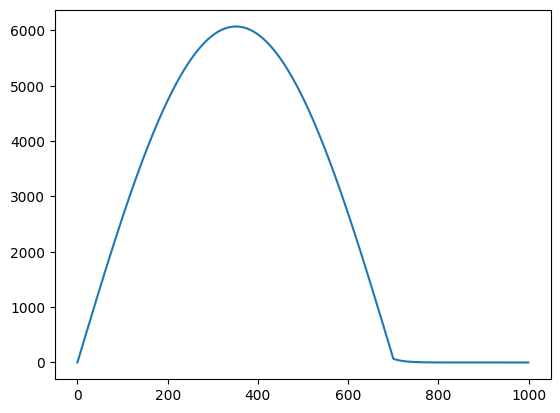

In [309]:
phi_left=numerov_fwd(ene0,0,1e-5,h,N,Rw,V,l)
phi_right=numerov_bkw(ene0,0,1e-5,h,N,Rw,V,l)


phi_tol=build_tot_phi(phi_left,phi_right,Rw,h)

plt.plot(phi_tol)
plt.show()

In [310]:
ene0=ene0
ene1=ene0-delE

In [311]:
e_root=bisect(log_diff,ene0,ene1,args=(0,1e-5,h,N,Rw,V,l),xtol=1e-7)

In [312]:
e_root

-9.905473232269287

In [313]:
phi_left=numerov_fwd(e_root,0,1e-5,h,N,Rw,V,l)
phi_right=numerov_bkw(e_root,0,1e-5,h,N,Rw,V,l)

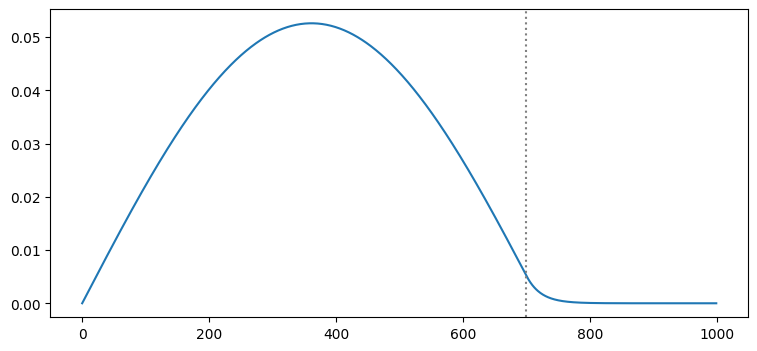

In [314]:
phi_tol=build_tot_phi(phi_left,phi_right,Rw,h)

phi_tol=phi_tol/np.sqrt(np.dot(phi_tol,phi_tol))
plt.figure(figsize=(9,4))
plt.plot(phi_tol)
plt.axvline(int(Rw/h),color='grey',ls=":")
plt.show()

----

## Case : General $l$

In [349]:
#get eff_RW= Rc: its the value of r where E< V
def get_eff_Rw(ene, V,h):
    #V=gen_pot(N,h,Rw,V0)
    #R_ind=0
    for i in range (1, len(V) ) : # avoid r=0 term
        if V[i] - 0.5*l*(l+1)/(h*i)**2 > ene : 
            return i
    return 'Err' # this should never happen for bound state

In [436]:
h=0.01
N=1000
ene=-.9
l=10
V0=-10
Rw=.7*N*h  # .x of the total width
V=gen_pot(N,h,Rw,V0) 

In [437]:
Rw= get_eff_Rw(ene,V,h)*h

In [438]:
Rw/h

782.0

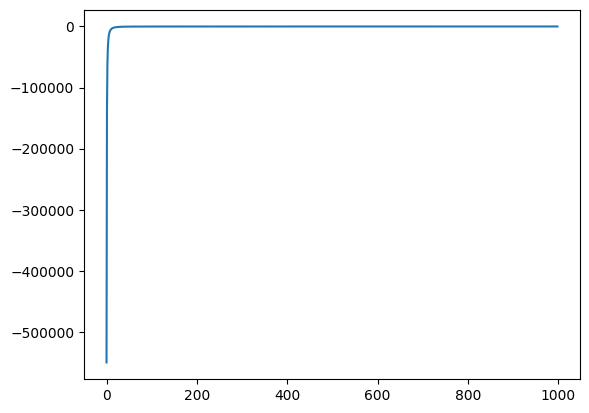

In [439]:
plt.plot([V[i]-0.5*l*(l+1)/(h*i)**2 for i in range(1,len(V))])

In [440]:
desired_nodes=l
delE=.1
ene0=V0

print (f"Determining the aprox energy with {desired_nodes} nodes") 
good_guess=False
while not good_guess :
    phi_left=numerov_fwd(ene0,0,1e-5,h,N,Rw,V,l)

    if find_nodes(phi_left) < desired_nodes:
        ene0 = ene0+ delE
        print (f"       Increasing the energy to {ene0:.2f}", end="\r")
        
    elif find_nodes(phi_left) == desired_nodes:
        print (f"       E= {ene0:3f}: This looks like a good guess\n")
        good_guess= True
    else:
        ene0 = ene0- delE
        print (f"       Decreasing the energy to {ene0:.2f}", end="\r")
        
    
print ("Determining the bounds for bisection") 
D0=log_diff(ene0,0,1e-5,h,N,Rw,V,l)
ene0=ene0+delE
D1=log_diff(ene0,0,1e-5,h,N,Rw,V,l)
Dprod=D0*D1

cnt=0
while Dprod > 0 and cnt < 100:
    
    D1=D0
    ene0=ene0+delE
    D0=log_diff(ene0,0,1e-5,h,N,Rw,V,l)
    Dprod=D0*D1
    print (f"{cnt}: Energy: {ene0}, product:{Dprod}")
    cnt+=1

print (f"Proceed for bisection with {ene0:.3f} and {ene0-delE:.3f}")
if ene0> 0 : print ("Attention! This is not a bound state!")

Determining the aprox energy with 10 nodes
       E= 4.400000: This looks like a good guess

Determining the bounds for bisection
Proceed for bisection with 4.500 and 4.400
Attention! This is not a bound state!


In [441]:
ene0=ene0
ene1=ene0-delE
print ("Bisecting... this may take a while, hold on!")
e_root=bisect(log_diff,ene0,ene1,args=(0,1e-5,h,N,Rw,V,l),xtol=1e-7)
print (f"Desired eigenvalue is {e_root:.3f}")

Bisecting... this may take a while, hold on!
Desired eigenvalue is 4.466


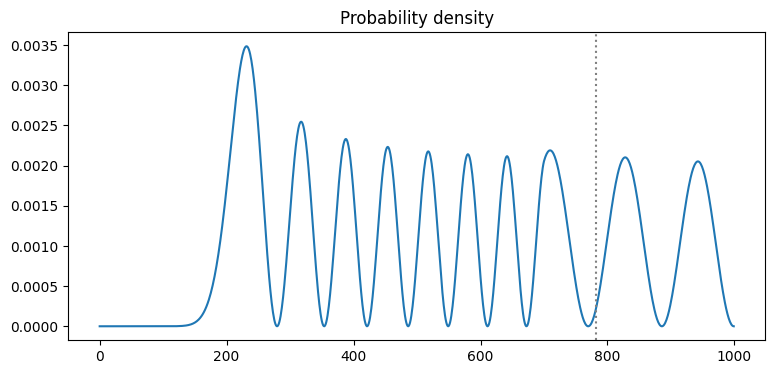

In [442]:
phi_left=numerov_fwd(e_root,0,1e-5,h,N,Rw,V,l)
phi_right=numerov_bkw(e_root,0,1e-5,h,N,Rw,V,l)

phi_tol=build_tot_phi(phi_left,phi_right,Rw,h)

phi_tol=phi_tol/np.sqrt(np.dot(phi_tol,phi_tol))
plt.figure(figsize=(9,4))
plt.plot(phi_tol)
plt.axvline(int(Rw/h),color='grey',ls=":")
plt.figure(figsize=(9,4))
plt.plot([i*i for i in phi_tol])
plt.axvline(int(Rw/h),color='grey',ls=":")
plt.title("Probability density")
plt.show()
#plt.show()